# Phase 1 - Project

Please find below the data treatment and analysis for the Phase 1 - Project from Flatiron School.

## The Problem
Microsoft is considering starting a movie studio. The analysis below will provide the company three business recommendations and illustrate the findings of the analysis.

In [61]:
#We start importing the relevant Python libraries to work with:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Inspecting and treating data
I start by visually inspecting the data, in order to answer the Project's Proposal. First, I connect to IMDB's database using SQLite and Pandas. Afterward, I create different Pandas DataFrames for each database:

In [2]:
#Connecting to Database using SQLite:
conn = sqlite3.connect('csv/im.db')
cur = conn.cursor()

#Retrieving tables names
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [3]:
#Creating a basic Query, I limit to 10 just to visually inspect it
pd.read_sql("""
SELECT *
FROM movie_basics
LIMIT 10;""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [6]:
#Checking the other tables, lets see whether there are relevant info
pd.read_sql("""
SELECT *
FROM movie_akas
LIMIT 10;""",conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
5,tt0369610,15,Jurassic World,GR,None,imdbDisplay,None,0.0
6,tt0369610,16,Jurassic World,IT,None,imdbDisplay,None,0.0
7,tt0369610,17,Jurski svijet,HR,None,imdbDisplay,None,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,None,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,None,imdbDisplay,None,0.0


In [8]:
#Checking the other tables, lets see whether there are relevant info
pd.read_sql("""
SELECT *
FROM persons
LIMIT 10;""",conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,None,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,None,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,None,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,None,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,None,"production_designer,art_department,set_decorator"
5,nm0062879,Ruel S. Bayani,NaN,None,"director,production_manager,miscellaneous"
6,nm0063198,Bayou,NaN,None,actor
7,nm0063432,Stevie Be-Zet,NaN,None,"composer,soundtrack"
8,nm0063618,Jeff Beal,1963.0,None,"composer,music_department,soundtrack"
9,nm0063750,Lindsay Beamish,NaN,None,"actress,miscellaneous"


In [9]:
#Checking the other tables, lets see whether there are relevant info
pd.read_sql("""
SELECT *
FROM principals
LIMIT 10;""",conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,None,"[""Lady Delia Morrison""]"
8,tt0323808,5,nm0362736,director,None,None
9,tt0323808,6,nm0811056,producer,producer,None


### SQL basic inspection
From the top movies it is clear that only using the movie_basics table won't be enough. We don't have information regarding budgets, box office, and rating. We will extend our dataset through JOINS to deepen our analysis. Also some other tables do not seem to provide useful data, so I will skip those (e.g. writers, known_for and directors).

It is clear to see that some information is missing (i.e. set as 'None'). Thus, further treatment of the dataset will be necessary. Due to computing limitations, I will have to limit the number of observations. One would reasonably start an analysis after the year of 1975. The motivation behind this is reasonable, since the blockbuster cinema age started after Steven Spielberg's Jaws (as indicated by specialized <a href='https://www.indiewire.com/2017/06/jaws-modern-blockbuster-steven-spielberg-1201844390/'>media</a>). Furthermore, most of the movies average around 90-120 minutes, <a href='https://towardsdatascience.com/are-new-movies-longer-than-they-were-10hh20-50-year-ago-a35356b2ca5b'>reference</a>, so I will limit the scope of the analysis considering this parameter too.

However, over the past few years demographics, economics, interests and markets changed considerably. This is an important point to be accounted for when discussing the results.

In [11]:
dfimdb = pd.read_sql("""
SELECT mb.movie_id, pri.person_id, primary_title,
original_title, start_year, runtime_minutes, genres,
averagerating, numvotes, 
region, language, types,
category, job, characters,
primary_name, primary_profession
FROM movie_basics as mb
JOIN movie_ratings as mv
ON mb.movie_id = mv.movie_id
JOIN movie_akas as ma
ON mv.movie_id = ma.movie_id
JOIN principals as pri
ON ma.movie_id = pri.movie_id
JOIN persons as per
ON pri.person_id = per.person_id
WHERE start_year >= 1975 AND runtime_minutes >=90
ORDER BY start_year DESC
;""", conn)

#Inspecting the DataFrame
dfimdb.head(10)

,movie_id,person_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,region,language,types,category,job,characters,primary_name,primary_profession
0,tt0066787,nm0002411,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,None,None,None,director,None,None,Mani Kaul,"director,writer,actor"
1,tt0066787,nm0045119,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,None,None,None,actress,None,None,Aruna Irani,"actress,producer,director"
2,tt0066787,nm0451809,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,None,None,None,actor,None,"[""Kalidasa""]",Arun Khopkar,"director,actor,assistant_director"
3,tt0066787,nm0536728,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,None,None,None,cinematographer,director of photography,None,K.K. Mahajan,"cinematographer,producer"
4,tt0066787,nm0754829,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,None,None,None,actress,None,"[""Mallika""]",Rekha Sabnis,"actress,assistant_director"
5,tt0066787,nm0794511,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,None,None,None,actor,None,"[""Vilom""]",Om Shivpuri,actor
6,tt0066787,nm2600399,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,None,None,None,composer,None,None,Jaidev Verma,"composer,music_department,soundtrack"
7,tt0066787,nm0002411,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,None,None,original,director,None,None,Mani Kaul,"director,writer,actor"
8,tt0066787,nm0045119,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,None,None,original,actress,None,None,Aruna Irani,"actress,producer,director"
9,tt0066787,nm0451809,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,None,None,original,actor,None,"[""Kalidasa""]",Arun Khopkar,"director,actor,assistant_director"


In [12]:
#checking data types
dfimdb.dtypes

movie_id               object
person_id              object
primary_title          object
original_title         object
start_year              int64
runtime_minutes       float64
genres                 object
averagerating         float64
numvotes                int64
region                 object
language               object
types                  object
category               object
job                    object
characters             object
primary_name           object
primary_profession     object
dtype: object

### Creating DataFrames
It is worth mentioning that I did not select DISTINCT values right away. From visual inspection we can tell that there are series as well in the database and this could be something to be explored further into the future. Next, I create a DataFrame from the other spreadsheets. Let's take a quick look at each one of them.

In [13]:
#dfbm is the bom.movie_gross.csv DataFrame
dfbm = pd.read_csv('csv/bom.movie_gross.csv')

dfbm.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [14]:
#dfmov is the rt.movie_info.tsv DataFrame
dfmov = pd.read_csv('csv/rt.movie_info.tsv', sep = '\t')

dfmov.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [15]:
#dfrtn is the rt.reviews.tsv DataFrame
dfrt = pd.read_csv('csv/rt.reviews.tsv', sep = '\t')

dfrt.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 4: invalid start byte

In [16]:
#It seems that we had an encoding error
!file 'csv/rt.reviews.tsv'

#We can tell now that we have an ASCII file, we then select the proper encoding (ISO-8859-1)
dfrt = pd.read_csv('csv/rt.reviews.tsv', sep = '\t', encoding = 'ISO-8859-1')
dfrt.head()

csv/rt.reviews.tsv: ASCII text, with very long lines (315), with CRLF line terminators


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [17]:
#dftm is the tmdb.movies.csv DataFrame
dftm = pd.read_csv('csv/tmdb.movies.csv')
dftm.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [18]:
#dftn is the tn.movie_budgets.csv DataFrame
dftn = pd.read_csv('csv/tn.movie_budgets.csv')
dftn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Overview from visual inspection of database/files
Now I have some initial information regarding the files. It is now becoming clearer that:
<ul>
    <li>The IMDB database has information regarding all of the movies and their overall information, such as: year, genre, rating (from IMDB users), runtime minutes, genre, etc.;</li>
    <li>The BM database (dfbm DataFrame) has useful information about how a movie fared in domestic and foreign markets. It is a useful information to show the most profitable movies. It also indicates when movies were launched to DVD/BluRay, etc.;</li>
    <li>The rt.movie_info.tsv file (from Rotten Tomatoes, dfmov DataFrame) has information that overlaps other previous information, with the exception of the Rating Classification (G, PG, R - the general classification from the Motion Picture Association). It seems that the Rotten Tomatoes databases can be joined using the id indicator as a Pandas index;</li>
    <li>The other Rotten Tomato DataFrame (rt.reviews.tsv) doesn't seem to provide - at least for now - the most relevant information. It illustrates reviews from the Rotten Tomatoes website. I won't discard this information, but it will not be the primary focus of our analysis... for now;</li>
    <li>The TMDB database (DataFrame dftm) has some information that can be linked with other databases for deeper analysis;</li>
    <li>The dftn DataFrame has some of the most important information to assess the profitability of movies: its budget and how the movie fared.</li>
</ul>

After this initial eyeballing of the data, let's get to work!

In [19]:
#Let's join the DataFrames - merging the Rotten Tomatoes database. I join using the inner method
dfrt.set_index('id')
dfmov.set_index('id')
dfrt = pd.merge(dfrt, dfmov, on='id', how='inner')

#Now I reset the index
dfrt.reset_index()

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


### Working with other DataFrames
The Rotten Tomatoes DataFrame was succesfully joined, leaving the IMDB, the BM, the TMDB, and the TN DataFrames to be joined. There is no clear identification that matches all of these databases, with the exception of the name of the movie.

The DataFrames dfbm and dftm have similar column names, such as title. I will start by matching on those, but also on the year. This is necessary because there could be movie remakes and matching just using the name could lead to problems.

Afterward, we can match this resulting DataFrame with dftn, using the 'movie' column as index. Note that there are a lot of overlapping fields.

One could have matched using domestic gross, but note how even though Estimates are close, their values are not precisely the same. So I prefered to take the safer route and change the column name on the dftn DataFrame.

In [20]:
#Lets match dfbm and dftm and call it df2
dfbm.set_index('title')
dftm.set_index('title')

df2 = pd.merge(dfbm, dftm, on='title', how='inner')
df2.reset_index()

,title,studio,domestic_gross,foreign_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000,2010,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340
1,Inception,WB,292600000.0,535700000,2010,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909
4,Iron Man 2,Par.,312400000.0,311500000,2010,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368


In [21]:
#Setting the Domestic Gross index
dftn.rename(columns = {'movie':'title'}, inplace = True)
dftn.set_index('title')
df2.set_index('title')

df1 = pd.merge(df2, dftn, on='title', how='inner')

In [22]:
#Discarding unrelevant or repeated columns
df1.drop(['domestic_gross_x', 'foreign_gross','Unnamed: 0', 'original_title' ], axis = 1, inplace = True)
df1.dtypes

title                 object
studio                object
year                   int64
genre_ids             object
id_x                   int64
original_language     object
popularity           float64
release_date_x        object
vote_average         float64
vote_count             int64
id_y                   int64
release_date_y        object
production_budget     object
domestic_gross_y      object
worldwide_gross       object
dtype: object

In [23]:
#Inspecting duplicated titles
df1.duplicated(subset='title').sum()
df1.sort_values(by=['title'], inplace = True)
dup = df1.duplicated(subset=['title'])
df1[dup]

,title,studio,year,genre_ids,id_x,original_language,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross
1219,A Bad Moms Christmas,STX,2017,[35],431530,en,16.604,2017-11-01,6.3,1044,40,"Nov 1, 2017","$28,000,000","$72,110,659","$127,710,550"
316,A Better Life,Sum.,2011,[99],418293,en,0.600,2015-05-01,10.0,1,84,"Jun 24, 2011","$10,000,000","$1,759,252","$1,884,251"
1077,A Monster Calls,Focus,2016,"[18, 14]",258230,en,11.128,2016-12-23,7.1,1918,41,"Jan 6, 2017","$43,000,000","$3,740,823","$46,414,530"
745,A Most Violent Year,A24,2014,"[80, 18, 53]",241239,en,12.271,2014-12-31,6.6,792,68,"Dec 31, 2014","$20,000,000","$5,749,134","$8,846,875"
1149,A Street Cat Named Bob,Cleopatra,2016,"[18, 10751, 35]",404378,en,7.120,2016-11-18,7.5,500,31,"Nov 18, 2016","$8,000,000","$82,703","$17,382,693"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,Wonder Woman,WB,2017,"[28, 14]",241224,en,2.841,2013-09-29,5.9,34,55,"Jun 2, 2017","$150,000,000","$412,563,408","$821,133,378"
932,Woodlawn,PFR,2015,[18],333596,en,5.575,2015-10-16,7.0,79,81,"Oct 16, 2015","$13,000,000","$14,394,097","$14,403,703"
279,Your Highness,Uni.,2011,"[14, 18, 28, 35, 878]",98957,en,0.600,2010-01-01,3.0,4,78,"Apr 8, 2011","$50,000,000","$21,596,445","$26,121,638"
950,Youth,FoxS,2015,"[18, 36]",457251,zh,5.082,2017-12-15,7.7,27,99,"Dec 4, 2015","$13,000,000","$2,703,296","$24,001,573"


In [24]:
#There are two Wonder Woman. it seems safe to drop the duplicates.
df1[df1['title'] == 'Wonder Woman']

,title,studio,year,genre_ids,id_x,original_language,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross
1161,Wonder Woman,WB,2017,"[12, 14, 10752, 10749]",297762,en,31.618,2017-06-02,7.3,12566,55,"Jun 2, 2017","$150,000,000","$412,563,408","$821,133,378"
1160,Wonder Woman,WB,2017,"[28, 14]",241224,en,2.841,2013-09-29,5.9,34,55,"Jun 2, 2017","$150,000,000","$412,563,408","$821,133,378"


In [25]:
df1.drop_duplicates(subset = ['title', 'year'], keep = 'first', inplace = True)

In [26]:
df1.duplicated(subset='title').sum()

0

### Summing it all together
Alright, the matching of all auxiliar databases looks good. So now we match with the imdb one. In order to do so, and to avoid the potential pitfalls as explained before, I am going to match using the name of the movies, that is the 'primary_title' as listed on the imdb database.

In [27]:
#Now we join all of our databases
dfimdb.rename(columns = {'primary_title': 'title', 'start_year': 'year'}, inplace = True)
dfimdb.set_index('title')
df1.set_index('title')
dfimdb.drop_duplicates(subset='movie_id', keep = 'first', inplace = True)
df = pd.merge(dfimdb, df1, on = ['title','year'], how = 'inner')
df.head(10)

,movie_id,person_id,title,original_title,year,runtime_minutes,genres,averagerating,numvotes,region,...,original_language,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,tt1034415,nm0000783,Suspiria,Suspiria,2018,152.0,"Fantasy,Horror,Mystery",6.8,37360,None,...,en,16.925,2018-10-26,7.0,752,81,"Oct 26, 2018","$20,000,000","$2,483,472","$7,034,615"
1,tt1072748,nm0000545,Winchester,Winchester,2018,99.0,"Biography,Drama,Fantasy",5.4,24351,None,...,en,12.440,2018-02-02,5.7,884,95,"Feb 2, 2018","$3,500,000","$25,091,816","$44,378,040"
2,tt1213641,nm0151419,First Man,First Man,2018,141.0,"Biography,Drama,History",7.4,120009,None,...,en,22.958,2018-10-12,7.1,2304,6,"Oct 12, 2018","$60,000,000","$44,936,545","$105,203,825"
3,tt1259528,nm0004799,Den of Thieves,Den of Thieves,2018,140.0,"Action,Crime,Drama",7.0,69648,None,...,en,22.738,2018-01-19,6.6,1244,3,"Jan 19, 2018","$30,000,000","$44,947,622","$80,131,391"
4,tt1365519,nm0324658,Tomb Raider,Tomb Raider,2018,119.0,"Action,Adventure,Fantasy",6.3,163560,None,...,en,24.968,2018-03-16,6.3,4310,70,"Mar 16, 2018","$90,000,000","$58,250,803","$273,477,501"
5,tt1413492,nm0000988,12 Strong,12 Strong,2018,130.0,"Action,Drama,History",6.6,50155,None,...,en,13.183,2018-01-19,5.6,1312,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378"
6,tt1477834,nm0000353,Aquaman,Aquaman,2018,143.0,"Action,Adventure,Fantasy",7.1,263328,None,...,en,38.102,2018-12-21,6.8,6155,36,"Dec 21, 2018","$160,000,000","$335,061,807","$1,146,894,640"
7,tt1571234,nm0001392,Mortal Engines,Mortal Engines,2018,128.0,"Action,Adventure,Fantasy",6.1,70193,None,...,en,40.095,2018-12-14,6.0,1751,4,"Dec 14, 2018","$100,000,000","$15,951,040","$85,287,417"
8,tt1590193,nm0000553,The Commuter,The Commuter,2018,105.0,"Action,Mystery,Thriller",6.3,83114,None,...,en,20.063,2018-01-12,6.2,2394,62,"Jan 12, 2018","$40,000,000","$36,343,858","$101,985,431"
9,tt1620680,nm0000702,A Wrinkle in Time,A Wrinkle in Time,2018,109.0,"Adventure,Family,Fantasy",4.2,34888,None,...,en,12.529,2018-03-09,5.0,1073,58,"Mar 9, 2018","$103,000,000","$100,478,608","$133,401,882"


In [28]:
#Filtering out the irrelevant columns
df = df.loc[:, ['movie_id', 'studio', 'title', 'year', 'release_date_x', 'genres', 'runtime_minutes', 
                'averagerating', 'numvotes', 'category', 'primary_name',
                'primary_profession', 'popularity', 'vote_average',
                'vote_count', 'production_budget', 'domestic_gross_y', 'worldwide_gross']]

### Checking our DataFrame
After joining and filtering it is time for further investigation of the data. Let's check how our final DataFrame looks like.

In [29]:
df

,movie_id,studio,title,year,release_date_x,genres,runtime_minutes,averagerating,numvotes,category,primary_name,primary_profession,popularity,vote_average,vote_count,production_budget,domestic_gross_y,worldwide_gross
0,tt1034415,Amazon,Suspiria,2018,2018-10-26,"Fantasy,Horror,Mystery",152.0,6.8,37360,writer,Dario Argento,"writer,director,producer",16.925,7.0,752,"$20,000,000","$2,483,472","$7,034,615"
1,tt1072748,LGF,Winchester,2018,2018-02-02,"Biography,Drama,Fantasy",99.0,5.4,24351,actress,Helen Mirren,"actress,director,producer",12.440,5.7,884,"$3,500,000","$25,091,816","$44,378,040"
2,tt1213641,Uni.,First Man,2018,2018-10-12,"Biography,Drama,History",141.0,7.4,120009,actor,Kyle Chandler,"actor,producer,director",22.958,7.1,2304,"$60,000,000","$44,936,545","$105,203,825"
3,tt1259528,STX,Den of Thieves,2018,2018-01-19,"Action,Crime,Drama",140.0,7.0,69648,producer,Mark Canton,"producer,production_manager,miscellaneous",22.738,6.6,1244,"$30,000,000","$44,947,622","$80,131,391"
4,tt1365519,WB,Tomb Raider,2018,2018-03-16,"Action,Adventure,Fantasy",119.0,6.3,163560,actor,Walton Goggins,"actor,producer",24.968,6.3,4310,"$90,000,000","$58,250,803","$273,477,501"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,tt1542344,FoxS,127 Hours,2010,2010-11-05,"Adventure,Biography,Drama",94.0,7.6,323949,director,Danny Boyle,"director,producer,writer",11.435,7.0,4469,"$18,000,000","$18,335,230","$60,217,171"
945,tt1555064,SGem,Country Strong,2010,2010-12-22,"Drama,Music",117.0,6.3,16296,actress,Gwyneth Paltrow,"actress,soundtrack,producer",7.567,6.3,126,"$15,000,000","$20,218,921","$20,601,987"
946,tt1564585,Uni.,Skyline,2010,2010-11-12,"Action,Sci-Fi,Thriller",92.0,4.4,83710,actor,Eric Balfour,"actor,producer,director",8.847,4.8,833,"$10,000,000","$21,416,355","$68,264,973"
947,tt1570989,IFC,Tiny Furniture,2010,2010-11-12,"Comedy,Drama,Romance",98.0,6.2,13397,producer,Alicia Van Couvering,"producer,production_manager,miscellaneous",6.695,5.9,82,"$50,000","$391,674","$424,149"


In [30]:
#Checking duplicated values by movie_id
df.duplicated(subset = ['movie_id', 'title']).sum()

0

In [31]:
#From the previous info, we can see that production_budget, domestic_gross and 
# worldwide gross need to be set as floats. But we have to remove the dollar sign first

#Transforming release_date_x and domestic_gross_y into a more palatable format
df['release_date_x'] = pd.to_datetime(df['release_date_x'], format = "%Y-%m-%d")
df.rename(columns = {'release_date_x': 'release_date', 'domestic_gross_y': 'domestic_gross'}, inplace = True)

#Maybe I could have looped to do this... I don't see the necessity though 
df['production_budget'] = df['production_budget'].replace({'\$':'', ",": ''}, regex = True)
df['domestic_gross'] = df['domestic_gross'].replace({'\$': '', ",": ''}, regex = True)
df['worldwide_gross'] = df['worldwide_gross'].replace({'\$': '', ",": ''}, regex = True)

#Converting to floats in order to sort
df['production_budget'] = df['production_budget'].astype(float)

df['domestic_gross'] = df['domestic_gross'].astype(float)

df['worldwide_gross'] = df['worldwide_gross'].astype(float)

### First investigation - eyeballing the clean data
After running all the procedures above, we can start delving deeper into the data. First, I start by separating a few columns to assess what are the top 10 Movies according to worlwide gross revenues. It will become clear that there is a clustering of studios according to revenues both domestica and worldwide.

In [32]:
#Now let's return the 10 best grossing movies ever in the world and domestically
df.loc[:, ['title', 'studio', 'year', 'genres','runtime_minutes', 'domestic_gross',
           'worldwide_gross']].sort_values('worldwide_gross', ascending = False).head(10)

,title,studio,year,genres,runtime_minutes,domestic_gross,worldwide_gross
27,Avengers: Infinity War,BV,2018,"Action,Adventure,Sci-Fi",149.0,678815482.0,2.048134e+09
279,Jurassic World,Uni.,2015,"Action,Adventure,Sci-Fi",124.0,652270625.0,1.648855e+09
349,Furious 7,Uni.,2015,"Action,Crime,Thriller",137.0,353007020.0,1.518723e+09
330,Avengers: Age of Ultron,BV,2015,"Action,Adventure,Sci-Fi",141.0,459005868.0,1.403014e+09
13,Black Panther,BV,2018,"Action,Adventure,Sci-Fi",134.0,700059566.0,1.348258e+09
38,Jurassic World: Fallen Kingdom,Uni.,2018,"Action,Adventure,Sci-Fi",128.0,417719760.0,1.305773e+09
581,Frozen,BV,2013,"Adventure,Animation,Comedy",102.0,400738009.0,1.272470e+09
22,Incredibles 2,BV,2018,"Action,Adventure,Animation",118.0,608581744.0,1.242521e+09
134,The Fate of the Furious,Uni.,2017,"Action,Crime,Thriller",136.0,225764765.0,1.234846e+09
512,Iron Man 3,BV,2013,"Action,Adventure,Sci-Fi",130.0,408992272.0,1.215392e+09


### Further refinement
The top 10 best grossing movies are generally action movies/adventure movies from the BV (Buena Vista) or Uni. (Universal) Studios. I start applying some formats for better visibility. I also create return metrics, such as the return on investment domestically, globally and abroad. 

A return is defined as The amount of revenues, divided by the production budget and subtracted from 1. The metric is useful in assessing how a movie fared since it will rule out inflationary effects and will give a more palatable comparison among movies.

Furthermore, the movie list certainly incorporates several studios from different sizes - to huge blockbuster ones such as Disney (through Buena Vista) and Warner Brothers, to small independent ones. For a first set of analysis, I will group into studios with more than 25 entries as big studios - while the rest will be categorized as 'Small/Indie'.

It will become evident that Warner Brothers has two entries (WB and WB NL - which stands for New Line Cinema); Fox also has two entries (Fox and FoxS - which stands for either Fox Studios or Fox Searchlight). I will group them accordingly.

In [33]:
#Setting a format to 'look good'
df['worldwide str'] = df['worldwide_gross'].apply(lambda x: '${:,.2f}'.format(x))
df['domestic str'] = df['domestic_gross'].apply(lambda x: '${:,.2f}'.format(x))
df['production str'] = df['production_budget'].apply(lambda x: '${:,.2f}'.format(x))

#Calculating the return on investment: total, domestic and foreign
df['worldwide return'] = df['worldwide_gross']/df['production_budget'] - 1
df['domestic return'] = df['domestic_gross']/df['production_budget'] - 1
df['total return'] = (df['domestic_gross'] + df['worldwide_gross'])/df['production_budget'] - 1

In [34]:
#Checking studios
df['studio'].value_counts()[:15]

Uni.       105
Fox         92
WB          85
BV          67
Sony        60
Par.        59
LGF         48
FoxS        39
Focus       34
WB (NL)     33
Wein.       27
LG/S        25
Rela.       21
ORF         21
SPC         19
Name: studio, dtype: int64

In [63]:
#Substituting New Line and Fox and creating top lists
df.loc[df['studio'] == 'WB (NL)', 'studio'] = 'WB'

df.loc[df['studio'] == 'FoxS', 'studio'] = 'Fox'

#Substituting studios with less than 25 entries
counts = df['studio'].value_counts()
idx = counts[counts.lt(25)].index

df.loc[df['studio'].isin(idx), 'studio group'] = 'Other/Indie'
df.loc[df['studio group'].isnull(), 'studio group'] = df['studio']


In [36]:
df['studio'].value_counts()

Fox        131
WB         118
Uni.       105
BV          67
Sony        60
          ... 
Relbig.      1
Viv.         1
Osci.        1
P4           1
App.         1
Name: studio, Length: 70, dtype: int64

In [37]:
#Data Cleaning/ordering almost finished
df = df.sort_values(by=['production_budget', 'worldwide_gross'], ascending = False)

df_total = df.loc[:,['studio', 'runtime_minutes', 'domestic return', 'worldwide return', 'total return'                  
                    ]]

## First set of analysis: Production Budgets, Domestic Gross, and Worldwide Gross
After the round of data cleaning and DataFrame preparation we start our batch of analysis. I start plotting some graphs to give us some visual insights and create/analyze the return on investment of the top movies and their characteristics.

### Histogram of Production Budgets, Domestic Gross, and Worldwide Gross
I asses what is the frequency of movies according to: Production Budgets, Domestic Gross, and Worldwide Gross. To wit, worldwide gross means the rest of the world except USA and Canada - so there is no overlap of Domestic Gross when account for Worldwide Gross.

Performing a visual inspection, it is clear that all of these distribuitions are highly skewed - with most of the values concentraded around the 100-200 million dollar range.

The statistics can be summarized as follows:
<ul>
    <li>The average movie production has a cost of 54 million dollars, and a standard deviation of 60 million. The median movie production cost is 50 million dollars, indicating the asymmetrical nature of the distribution;</li>
    <li> The mean domestic gross is 71 million dollars. Whereas the max value is a whopping 700 million! </li>    
    <li> The worldwide gross mean is of almost 180 million dollars - which may indicate that distributing overseas could be a good business opportunity. The median value of the worldwide gross is 80 milliion. </li>
</ul>


We can visualize better this estimates using a box-plot diagram. However, we infer that making movies is a huge investment! As such, and since values from our clean dataset has a time window between 2010 and 2018, economic effects, such as inflation may taint our conclusions.

As such, I analyze the return on investment - which sweeps out this effect.

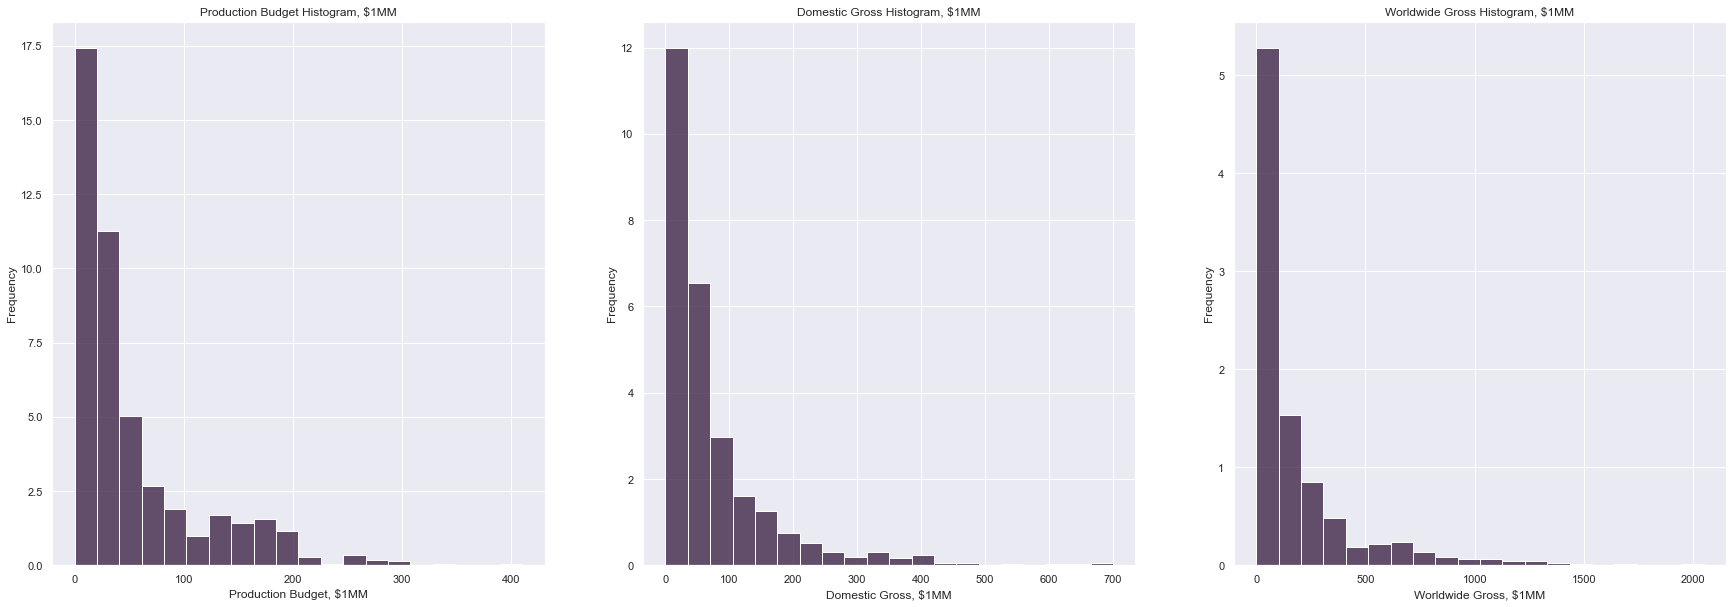

In [51]:
#VIZ using Seaborn
fig, ax = plt.subplots(1,3, figsize = (30,10))
sns.set_theme(palette = 'rocket')

df['production million'] = df['production_budget']/1000000
df['domestic million'] = df['domestic_gross']/1000000
df['worldwide million'] = df['worldwide_gross']/1000000

sns.histplot(ax = ax[0], data = df, x = 'production million', stat = 'frequency', bins = 20)
ax[0].set(title = 'Production Budget Histogram, $1MM')
ax[0].set_xlabel('Production Budget, $1MM')

sns.histplot(ax = ax[1], data = df, x = 'domestic million', stat = 'frequency', bins = 20)
ax[1].set(title = 'Domestic Gross Histogram, $1MM')
ax[1].set_xlabel('Domestic Gross, $1MM')

sns.histplot(ax = ax[2], data = df, x = 'worldwide million', stat = 'frequency', bins = 20)
ax[2].set(title = 'Worldwide Gross Histogram, $1MM')
ax[2].set_xlabel('Worldwide Gross, $1MM')


plt.show()

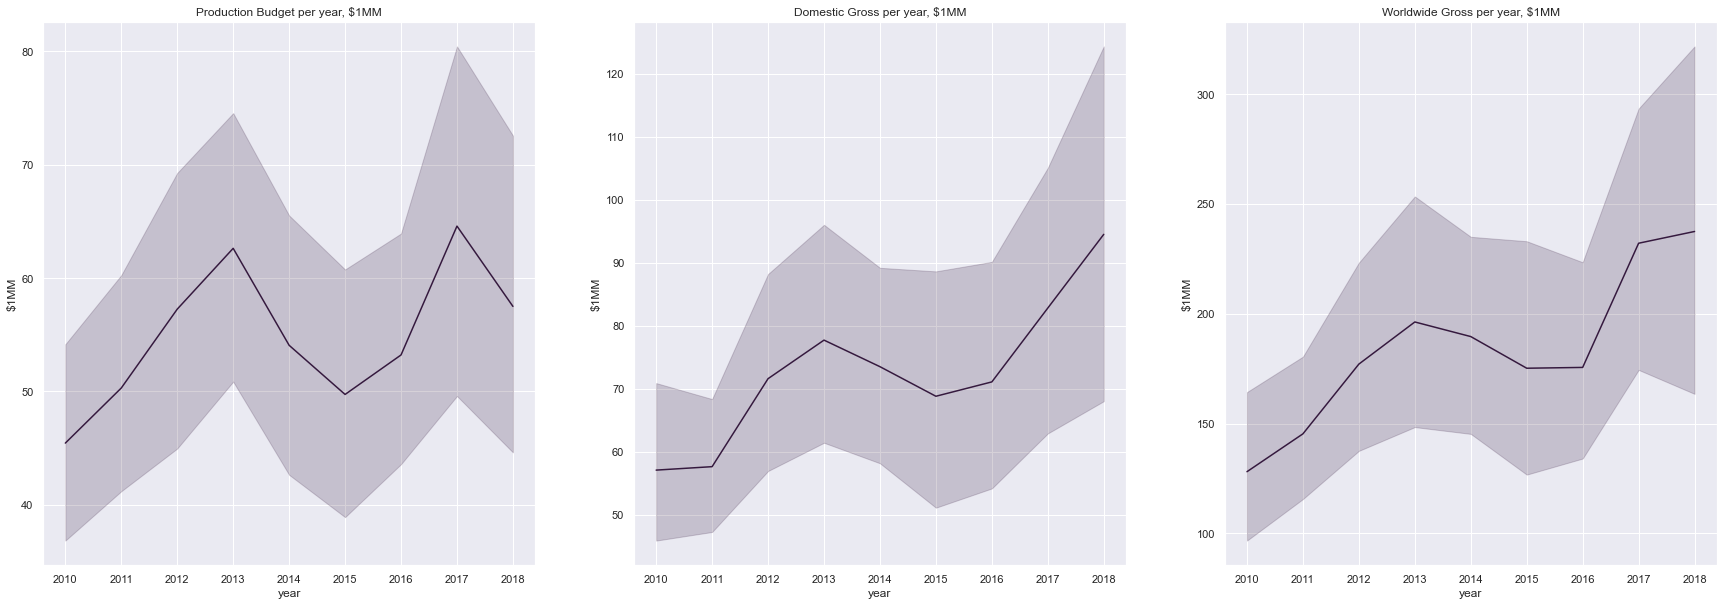

In [57]:
#Line Graphs
fig, ax = plt.subplots(1,3, figsize = (30,10))
sns.set_theme(palette = 'rocket')
sns.lineplot(ax = ax[0], data = df, y = 'production million', x='year')
ax[0].set(title='Production Budget per year, $1MM', ylabel = '$1MM')

sns.lineplot(ax = ax[1], data = df, y = 'domestic million', x='year')
ax[1].set(title = 'Domestic Gross per year, $1MM', ylabel = '$1MM')

sns.lineplot(ax = ax[2], data = df, y = 'worldwide million', x='year')
ax[2].set(title = 'Worldwide Gross per year, $1MM', ylabel = '$1MM')
plt.show()

In [71]:
df['production million'].describe() , df['domestic million'].describe(), df['worldwide million'].describe()

(count    949.000000
 mean      54.350667
 std       60.110249
 min        0.050000
 25%       14.000000
 50%       30.000000
 75%       70.000000
 max      410.600000
 Name: production million, dtype: float64,
 count    949.000000
 mean      71.302683
 std       91.931106
 min        0.000000
 25%       13.942007
 50%       40.479370
 75%       86.260045
 max      700.059566
 Name: domestic million, dtype: float64,
 count     949.000000
 mean      179.546156
 std       255.766956
 min         0.000000
 25%        25.947983
 50%        80.171596
 75%       215.098356
 max      2048.134200
 Name: worldwide million, dtype: float64)

### Analyzing Budgets per Top Studios (Buena Vista, Sony, Warner Brothers, Universal, Paramount and Fox)
The variability of production budgets seem to be wide across and along studios each year. Let's analyze Buena Vista (BV), for instance. It has a median production cost around 100 million dollars or more throughout the years. Also, besides the estimates from 2017, BV interquartile range (IQR) is very wide, which may indicate that the studio is investing in different types of movies (e.g., a superhero movie full of visual effects should be more investment-intensive than other types). Furthermore, Buena Vista maximum production costs are almost always the highest in the industry.

Other studios such as Sony and Universal have more modest values - but also varying in magnitude throughout the years. In some years, Paramount, Warner Brothers and Fox seem to exhibit some jump to their production budgets - which could denote a seasonal strategy. Besides that, that is no common visual pattern to the top studios budget.

Below the first graph, we can visually inspect the Production Budget, Domestic Gross and Worldwide Gross trend throughout the years, breaking it down by the top studios (without confidence intervals).

Note to reader: outliers were removed from the box-plot figure to better suit the Jupyter Notebook visualization.


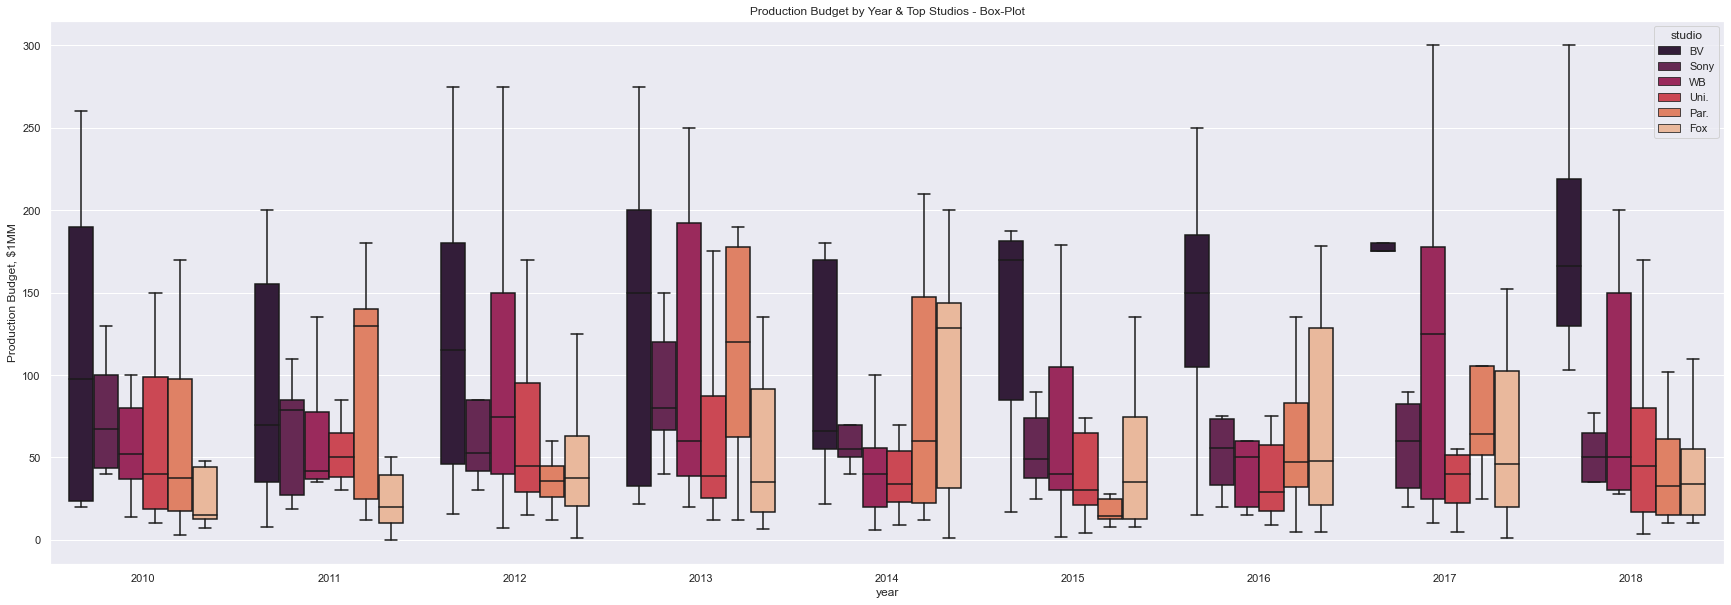

In [52]:
#Box-Plot, now analyzing the top studios per year - more than 50 entries          
top_list = ['Fox', 'WB', 'Uni.', 'BV', 'Sony', 'Par.']

idx = counts[counts.gt(50)].index

df_top = df.loc[df['studio'].isin(idx)]

fig, ax = plt.subplots(figsize = (30,10))
sns.boxplot(x ='year', y = 'production million', hue = 'studio', data = df_top, showfliers = False)
ax.set(title = 'Production Budget by Year & Top Studios - Box-Plot', ylabel = 'Production Budget, $1MM');


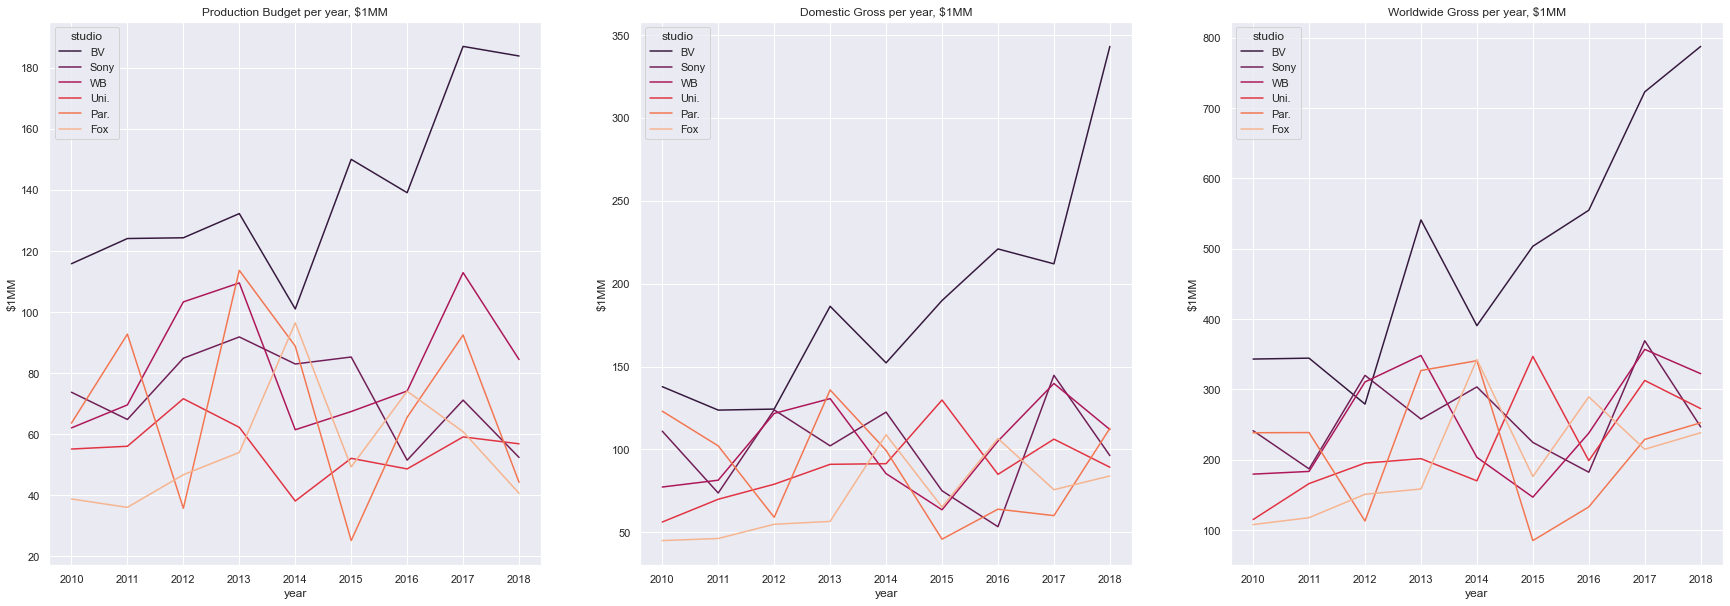

In [56]:
#Line Graphs
fig, ax = plt.subplots(1,3, figsize = (30,10))
sns.set_theme(palette = 'rocket')
sns.lineplot(ax = ax[0], data = df_top, y = 'production million', x='year', hue = 'studio', ci = None)
ax[0].set(title='Production Budget per year, $1MM', ylabel = '$1MM')

sns.lineplot(ax = ax[1], data = df_top, y = 'domestic million', x='year', hue = 'studio', ci = None)
ax[1].set(title = 'Domestic Gross per year, $1MM', ylabel = '$1MM')

sns.lineplot(ax = ax[2], data = df_top, y = 'worldwide million', x='year', hue = 'studio', ci = None)
ax[2].set(title = 'Worldwide Gross per year, $1MM', ylabel = '$1MM')
plt.show()

## Analyzing returns: the real deal
We have analyzed the initial figures of the movie-making business, but if we want to make an investment we better think of the expected return that we are going to have. As illustrated above, even though inflation did not vary widely throughout the 2010-2018 time window having a return metric can show the rate that the most profitable movies - and their characteristics - are.

The metrics that we are going to evaluate from now on are: total return (the sum of domestic and worldwide gross), domestic return and worldwide; each one of those numerators are subtracted from production budget and then scaled by the it, thus providing a return to the investment.

We then evaluate the main characteristics of those movies and make some business diagnostics.

### Movie Genres and Returns - a primer
On a visual inspection, we can see that movie returns are widely dispersed according to genres. It is worth mentioning that usually thrillers - according to our dataset - are able to get a return on investment (both domestically and worldwide). Romance and Mystery movies also seem to make a return on investment.

It is worth mentioning that the highest returns are concentrated as Drama, Horror and Comedy. We can filter down to skim off the movies that were unprofitable. Now we will take a lot at the general characteristics of the movies that had a return.

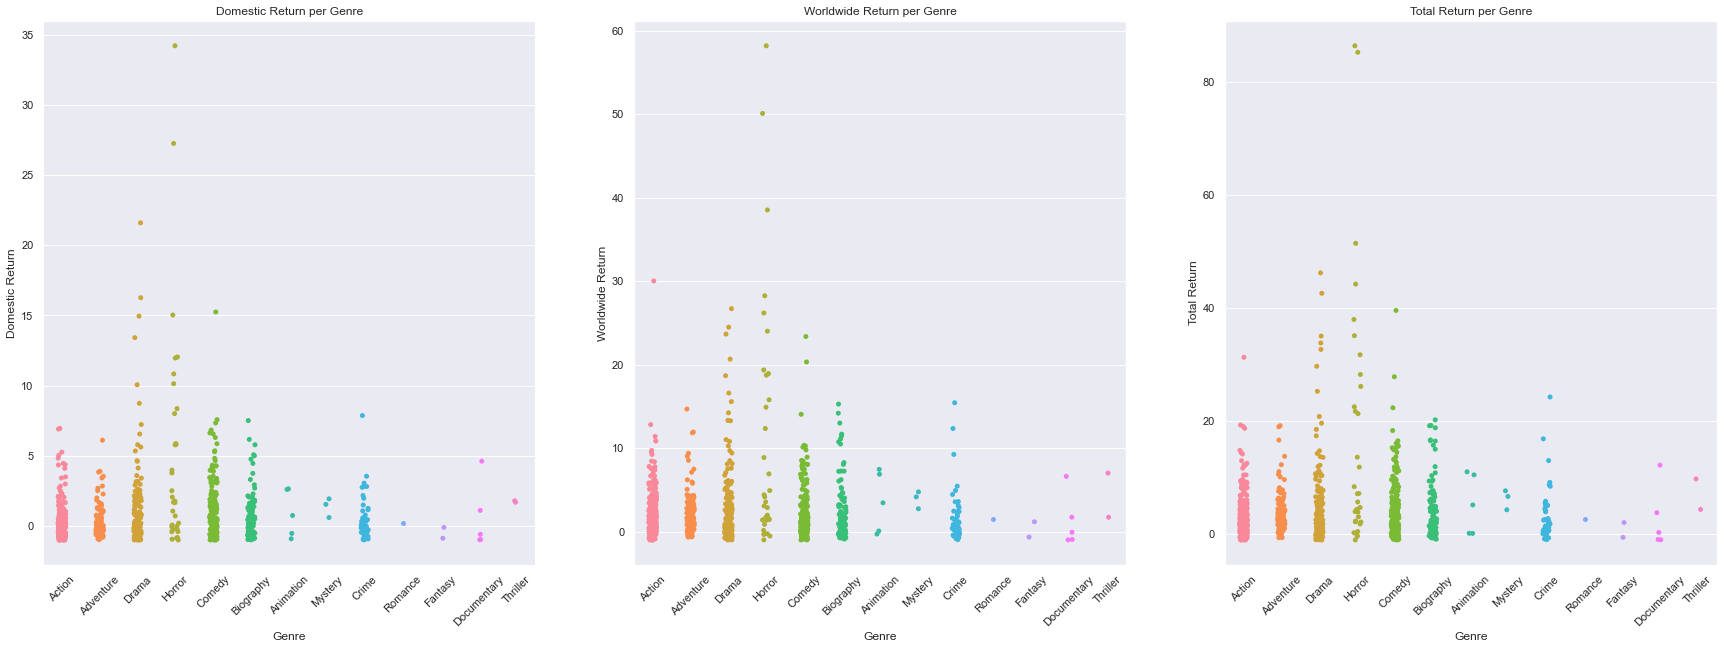

In [102]:
#Splitting into the first genre listed for each film
split_genres = df['genres'].str.split(pat = ',', expand = False)
df['1st genre'] = [x[0] for x in split_genres]

fig,ax = plt.subplots(1,3, figsize = (30,10))
sns.stripplot(ax = ax[0], data = df, x = '1st genre', y = 'domestic return')
ax[0].set(title = 'Domestic Return per Genre', ylabel = 'Domestic Return', xlabel = 'Genre')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 45)

sns.stripplot(ax = ax[1], data = df, x = '1st genre', y = 'worldwide return')
ax[1].set(title = 'Worldwide Return per Genre', ylabel = 'Worldwide Return', xlabel = 'Genre')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 45)

sns.stripplot(ax = ax[2], data = df, x = '1st genre', y = 'total return')
ax[2].set(title = 'Total Return per Genre', ylabel = 'Total Return', xlabel = 'Genre')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45);


In [70]:
#Movies that are able to return the production cost, domestically, worldwide and summing both
df_dom = df[df['domestic million'] > df['production million']]
df_wd = df[df['worldwide million'] > df['production million']]
df_total = df[df['total return'] > 1]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518 entries, 330 to 947
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_id            518 non-null    object        
 1   studio              518 non-null    object        
 2   title               518 non-null    object        
 3   year                518 non-null    int64         
 4   release_date        518 non-null    datetime64[ns]
 5   genres              518 non-null    object        
 6   runtime_minutes     518 non-null    float64       
 7   averagerating       518 non-null    float64       
 8   numvotes            518 non-null    int64         
 9   category            518 non-null    object        
 10  primary_name        518 non-null    object        
 11  primary_profession  518 non-null    object        
 12  popularity          518 non-null    float64       
 13  vote_average        518 non-null    float64     

(None, None, None)

In [107]:
df_ret = df.loc[:, ['title', 'studio', 'year', '1st genre', 'runtime_minutes', 'primary_name', 'production million',
                   'domestic million', 'worldwide million', 'domestic return', 'worldwide return', 'total return'
                   ]].sort_values('total return', ascending = False)

df_top10 = df_ret[:10]

### The top 10 best total return movies
Now we can filter our DataFrame to show the best 10 movies according to total return. As our previous visualization indicates, Horror movies seem to be a good return on investment. Of our top 10 best return on investment movies, 60% have Horror as their first genre. The other 30% are Drama and the last 10% is a Comedy.

In general, these movies have small investment - ranging from 0.1 to 7 million dollars max. Out of these top 10 movies, only 'A Ghost Story' and 'Sinister' are from smaller studios - A24 and LG/S, respectively.

In [106]:
df_top10

,title,studio,year,1st genre,runtime_minutes,primary_name,production million,domestic million,worldwide million,domestic return,worldwide return,total return
943,Paranormal Activity 2,Par.,2010,Horror,91.0,Jason Blum,3.0,84.752907,177.512032,27.250969,58.170677,86.421646
145,Get Out,Uni.,2017,Horror,104.0,Catherine Keener,5.0,176.040665,255.367951,34.208133,50.073590,85.281723
488,Annabelle,WB,2014,Horror,99.0,Alfre Woodard,6.5,84.273813,256.862920,11.965202,38.517372,51.482574
379,War Room,TriS,2015,Drama,120.0,Paul Mills,3.0,67.790117,73.975239,21.596706,23.658413,46.255119
690,Sinister,LG/S,2012,Horror,110.0,Ethan Hawke,3.0,48.086903,87.727807,15.028968,28.242602,44.271570
158,A Ghost Story,A24,2017,Drama,92.0,Casey Affleck,0.1,1.594798,2.769782,14.947980,26.697820,42.645800
689,Magic Mike,WB,2012,Comedy,110.0,Matthew McConaughey,7.0,113.721571,170.549753,15.245939,23.364250,39.610189
65,Truth or Dare,Uni.,2018,Horror,100.0,Jason Blum,3.5,41.411015,95.127344,10.831719,26.179241,38.010960
147,Happy Death Day,Uni.,2017,Horror,96.0,Toby Oliver,5.0,55.683845,125.010260,10.136769,24.002052,35.138821
168,10 Cloverfield Lane,Par.,2016,Drama,103.0,John Goodman,5.0,72.082999,108.286422,13.416600,20.657284,35.073884


Evaluating the best return domestically, we can check that still Horror has whopping 50% participation, being follow by Drama (40%) and completing 100%, Comedy. 

In [110]:
### Top 10 Return in Domestic Markets
df_dom10 = df_ret.sort_values('domestic return', ascending = False)
df_dom10[:10]

,title,studio,year,1st genre,runtime_minutes,primary_name,production million,domestic million,worldwide million,domestic return,worldwide return,total return
145,Get Out,Uni.,2017,Horror,104.0,Catherine Keener,5.0,176.040665,255.367951,34.208133,50.073590,85.281723
943,Paranormal Activity 2,Par.,2010,Horror,91.0,Jason Blum,3.0,84.752907,177.512032,27.250969,58.170677,86.421646
379,War Room,TriS,2015,Drama,120.0,Paul Mills,3.0,67.790117,73.975239,21.596706,23.658413,46.255119
807,Courageous,TriS,2011,Drama,129.0,Darian Corley,2.0,34.522221,35.185884,16.261111,16.592942,33.854053
689,Magic Mike,WB,2012,Comedy,110.0,Matthew McConaughey,7.0,113.721571,170.549753,15.245939,23.364250,39.610189
690,Sinister,LG/S,2012,Horror,110.0,Ethan Hawke,3.0,48.086903,87.727807,15.028968,28.242602,44.271570
158,A Ghost Story,A24,2017,Drama,92.0,Casey Affleck,0.1,1.594798,2.769782,14.947980,26.697820,42.645800
168,10 Cloverfield Lane,Par.,2016,Drama,103.0,John Goodman,5.0,72.082999,108.286422,13.416600,20.657284,35.073884
368,The Visit,Uni.,2015,Horror,94.0,Maryse Alberti,5.0,65.206105,98.677816,12.041221,18.735563,31.776784
488,Annabelle,WB,2014,Horror,99.0,Alfre Woodard,6.5,84.273813,256.862920,11.965202,38.517372,51.482574


It seems that great part of the worldwide return is also concentrated around Horror movies. The small investment, associated with interest from moviegoers seem to provide a safe return on investment. Globally, Horror has 60% share of best return movies, follow by Drama (30%) and the rest 10% being an Action movie - Dangal - from Bollywood.

In [112]:
### Top 10 Return in Worldwide Markets
df_wd10 = df_ret.sort_values('worldwide return', ascending = False)
df_wd10[:10]

,title,studio,year,1st genre,runtime_minutes,primary_name,production million,domestic million,worldwide million,domestic return,worldwide return,total return
943,Paranormal Activity 2,Par.,2010,Horror,91.0,Jason Blum,3.0,84.752907,177.512032,27.250969,58.170677,86.421646
145,Get Out,Uni.,2017,Horror,104.0,Catherine Keener,5.0,176.040665,255.367951,34.208133,50.073590,85.281723
488,Annabelle,WB,2014,Horror,99.0,Alfre Woodard,6.5,84.273813,256.862920,11.965202,38.517372,51.482574
277,Dangal,UTV,2016,Action,161.0,Aamir Khan,9.5,12.391761,294.654618,0.304396,30.016276,31.320671
690,Sinister,LG/S,2012,Horror,110.0,Ethan Hawke,3.0,48.086903,87.727807,15.028968,28.242602,44.271570
158,A Ghost Story,A24,2017,Drama,92.0,Casey Affleck,0.1,1.594798,2.769782,14.947980,26.697820,42.645800
65,Truth or Dare,Uni.,2018,Horror,100.0,Jason Blum,3.5,41.411015,95.127344,10.831719,26.179241,38.010960
851,Black Swan,Fox,2010,Drama,108.0,Natalie Portman,13.0,106.954678,331.266710,7.227283,24.482055,32.709338
147,Happy Death Day,Uni.,2017,Horror,96.0,Toby Oliver,5.0,55.683845,125.010260,10.136769,24.002052,35.138821
379,War Room,TriS,2015,Drama,120.0,Paul Mills,3.0,67.790117,73.975239,21.596706,23.658413,46.255119


## Genre Analysis

Grouping by genre, we are able to visualize that Horror movies are indeed - on average - more profitable. The production costs are not the highest ones from the genre distribution while return (whether it is total, domestic or worldwide) are. So, a safest bet would be to invest in Horror, Thriller, Mystery, Animation or Drama. 

In [160]:
df_genre = df_ret.groupby('1st genre').mean().sort_values('total return', 
                                                          ascending = False).style.hide_columns(subset=['year', 'runtime_minutes'])

In [169]:
df_genre

,production million,domestic million,worldwide million,domestic return,worldwide return,total return
1st genre,,,,,,
Horror,19.962121,58.875022,137.089521,5.143829,11.279805,17.423634
Thriller,10.000000,27.710335,69.577502,1.740043,4.370309,7.110352
Mystery,52.333333,111.422189,237.666482,1.358470,3.888130,6.246600
Animation,56.000000,135.531237,321.709174,0.910257,3.516277,5.426533
Drama,22.573647,32.995813,72.046767,1.083906,3.127939,5.211846
Comedy,27.176486,47.683964,86.317771,1.147823,2.608571,4.756394
Biography,25.982088,41.782201,86.764246,0.748250,2.624206,4.372456
Adventure,90.921101,112.421140,315.805059,0.445628,2.507727,3.953355
Crime,24.986667,32.167748,62.313557,0.520100,1.916290,3.436389
